# Capstone project 1: House prices advanced regression

## Machine Learning - Xgboost Model

In [1]:
import pandas as pd
import numpy as np

import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
import pickle

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load training and testing data
X_train = pd.read_csv('./dummy_data/X_train.csv',index_col=0).drop('SoldTime',axis=1)
X_test = pd.read_csv('./dummy_data/X_test.csv',index_col=0).drop('SoldTime',axis=1)
y_train = pd.read_csv('./dummy_data/y_train.csv',index_col=0,header = None)
y_test = pd.read_csv('./dummy_data/y_test.csv',index_col=0,header = None)

In [8]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,,,,,,
681,50.0,8012,6,5,30,30,0.0,543,119,261,...,0,0,0,0,0,0,1,0,0,0
1452,78.0,9262,8,5,1,0,194.0,0,0,1573,...,0,0,0,0,0,0,0,0,0,0
1197,58.0,14054,7,5,0,0,0.0,0,0,879,...,1,0,0,0,0,0,0,0,0,0
1025,0.0,15498,8,6,32,32,0.0,1165,400,0,...,0,0,0,0,0,0,0,0,0,0
158,92.0,12003,8,5,1,0,84.0,0,0,774,...,1,0,0,0,0,0,0,0,0,0


In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 318), (438, 318), (1022, 1), (438, 1))

### First Model

In [9]:
# First model, using grid search with xgboost-regressor

search_grid1 = {
    'learning_rate':np.arange(0.05,1,0.05),
    'subsample':np.arange(0.05,1,0.05),
    'max_depth':np.arange(3,10,1)
}
model1 = xgb.XGBRegressor(n_estimators=350,objective='reg:squarederror')

random_search_r2 = RandomizedSearchCV(estimator=model1,
                                      param_distributions=search_grid1,
                                      scoring= 'r2',
                                      cv=5,
                                      n_iter=10,
                                      n_jobs=4,
                                      verbose=1)
random_search_r2.fit(X_train.values,y_train.values)
print('Best score: ', random_search_r2.best_score_)
print('Bset model: ', random_search_r2.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  2.3min finished


Best score:  0.835357443975101
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8500000000000001, verbosity=1)


In [29]:
#Verify modeling fitting using test data

y_test_predict1 = random_search_r2.best_estimator_.predict(X_test.values)
r2 = r2_score(y_test,y_test_predict1)

print('r2:{:.3}'.format(r2))


r2:0.809


In [11]:
# save model
pickle.dump(random_search_r2.best_estimator_, open("xgb_model_r2.dat", "wb"))

### Second Model

In [12]:
search_grid2 = {
    'learning_rate':np.arange(0.05,1,0.05),
    'n_estimators':np.arange(300,900,50),
    'subsample':np.arange(0.05,1,0.05)
}
model2 = xgb.XGBRegressor(max_depth=8,objective='reg:squarederror')
random_search_mse = RandomizedSearchCV(estimator=model2,
                                       param_distributions=search_grid2,
                                       scoring='neg_mean_squared_error',
                                       cv=5,
                                       n_iter=10,
                                       n_jobs=4,
                                       verbose=1)
random_search_mse.fit(X_train.values,y_train.values)
print('Best score: ', random_search_mse.best_score_)
print('Bset model: ', random_search_mse.best_estimator_)
print('Best_RMSE: ',np.sqrt(np.abs(random_search_mse.best_score_)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  5.1min finished


Best score:  -1012992530.2622439
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=650,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7000000000000001, verbosity=1)
Best_RMSE:  31827.54357882876


In [28]:
#Verify modeling fitting using test data

y_test_predict2 = random_search_mse.best_estimator_.predict(X_test.values)
mse_r2 = r2_score(y_test,y_test_predict2)

print('r2:{:.3}'.format(mse_r2))

r2:0.827


In [14]:
# save model
pickle.dump(random_search_mse.best_estimator_, open("xgb_model_mse.dat", "wb"))

### Third Model

In [15]:
search_grid3 = {
    'learning_rate':np.arange(0.05,1,0.05),
    'n_estimators':np.arange(50,400,50),
    'subsample':np.arange(0.05,1,0.05)
}

random_search3 = RandomizedSearchCV(estimator=model2,
                                      param_distributions=search_grid3,
                                      scoring= 'r2',
                                      cv=5,
                                      n_iter=10,
                                      n_jobs = 4,
                                      verbose=1)
random_search3.fit(X_train.values,y_train.values)
print('Best score: ', random_search3.best_score_)
print('Bset model: ', random_search3.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.8min finished


Best score:  0.8440157495879881
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.4, verbosity=1)


In [27]:
#Verify modeling fitting using test data

y_test_predict3 = random_search3.best_estimator_.predict(X_test.values)
r2_3 = r2_score(y_test,y_test_predict3)

print('r2:{:.3}'.format(r2_3))

r2:0.865


In [17]:
# save model
pickle.dump(random_search3.best_estimator_, open("xgb_model3.dat", "wb"))

### Fourth Model

In [18]:
random_search4 = RandomizedSearchCV(estimator=model2,
                                       param_distributions=search_grid2,
                                       scoring='r2',
                                       cv=10,
                                       n_iter=10,
                                       n_jobs = 4,
                                       verbose=1)
random_search4.fit(X_train.values,y_train.values)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 11.8min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=8, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          ra...
                   param_distributions={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
  

In [19]:
print('Best score: ', random_search4.best_score_)
print('Bset model: ', random_search4.best_estimator_)
print('Best_RMSE: ',np.sqrt(np.abs(random_search4.best_score_)))

Best score:  0.8710428378278183
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.9500000000000001, verbosity=1)
Best_RMSE:  0.9332967576434723


In [26]:
#Verify modeling fitting using test data

y_test_predict4 = random_search4.best_estimator_.predict(X_test.values)
r2_4 = r2_score(y_test,y_test_predict4)

print('r2:{:.3}'.format(r2_4))

r2:0.822


# testing accuracy is not better than model3, no need to save
# Best model so far is model3:"xgb_model3.dat"

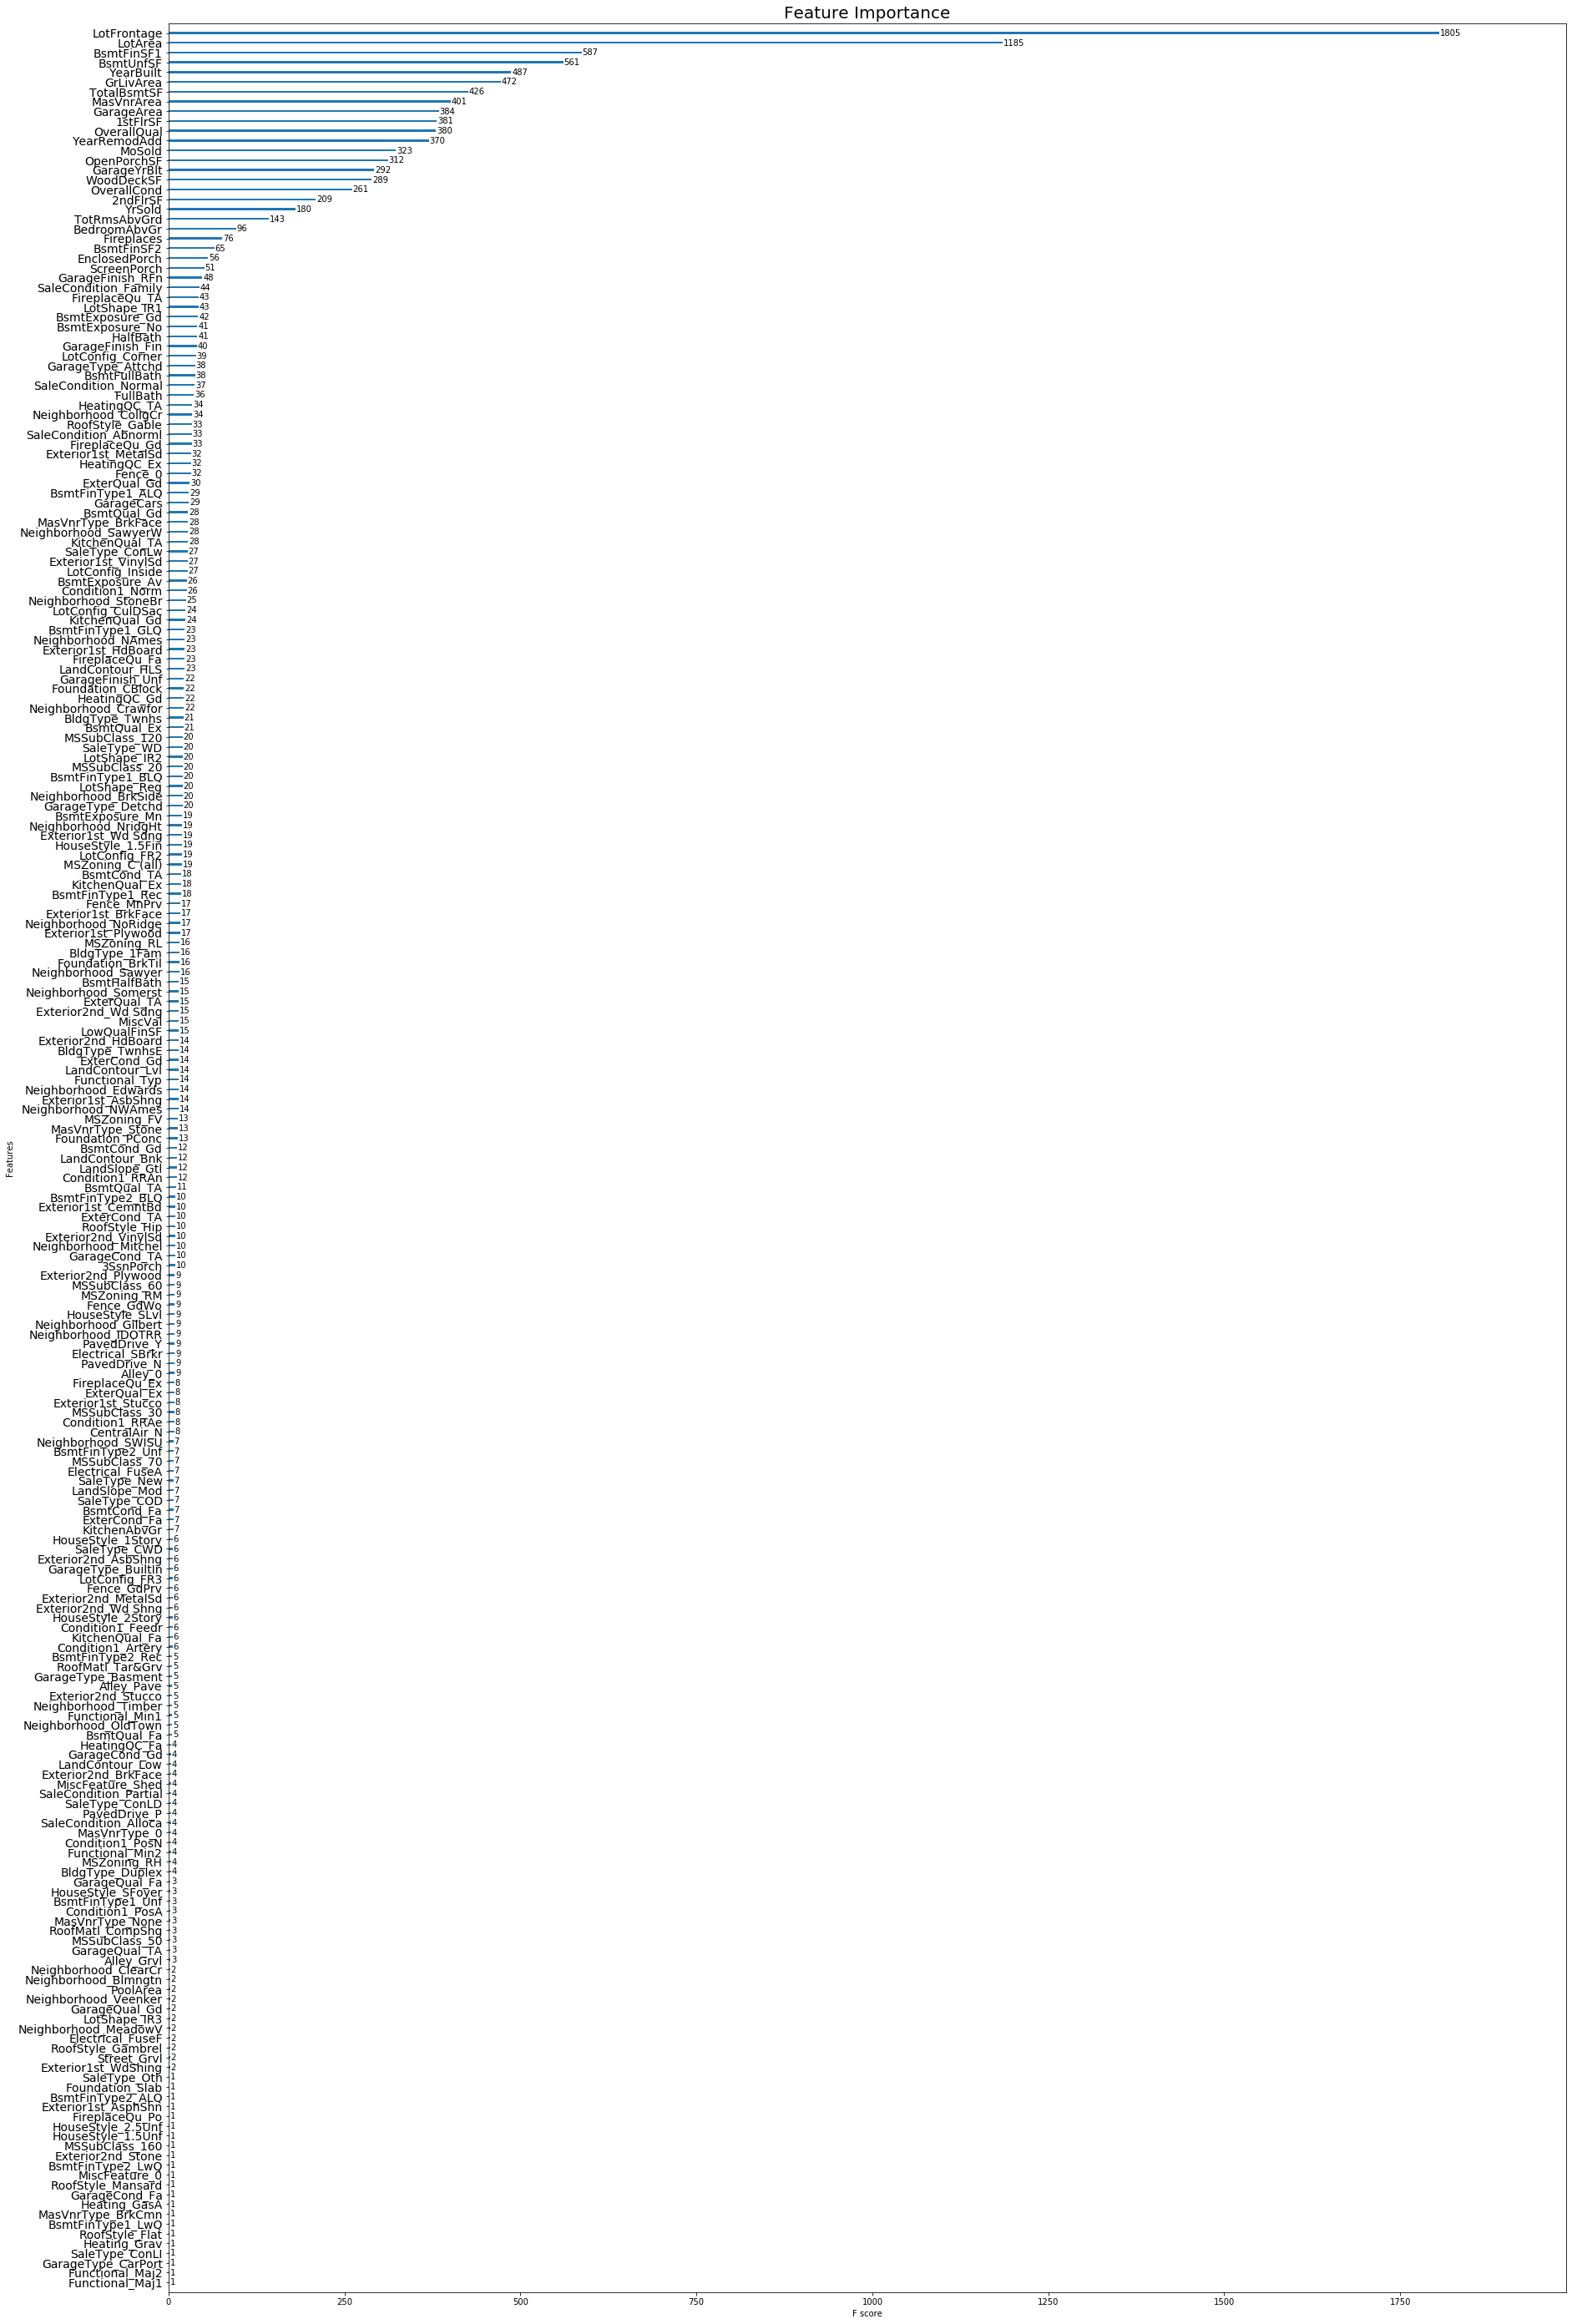

In [23]:
# Plot importance for beset model: model_mse
fig1, ax1 = plt.subplots(1,1,figsize=(30,50))

g1 = plot_importance(random_search3.best_estimator_,ax=ax1,grid=False)

oldy = g1.yaxis.get_majorticklabels()
feature_dict = dict(zip(['f'+str(i) for i in range(len(X_train.columns))], X_train.columns))
newy = [feature_dict[y._text] for y in oldy]
g1.set_yticklabels(newy,rotation=0,fontsize=14)

fig1.savefig('feature_importance')
plt.title('Feature Importance',fontsize=20)

plt.show()

In [ ]:
### PCA feature selection

In [5]:
train_X = pd.read_csv('PCA_trainX.csv',index_col=0)
test_X = pd.read_csv('PCA_testX.csv',index_col=0)

In [10]:
y_train = pd.read_csv('./dummy_data/y_train.csv',index_col=0,header = None)
y_test = pd.read_csv('./dummy_data/y_test.csv',index_col=0,header = None)

In [7]:
test_X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.363492,-1.760783,0.152266,0.149793,1.206666,0.857713,5.054591,-1.216042,-0.819539,-0.628764
1,2.634492,0.405540,-1.477866,0.541942,-2.785622,2.842732,0.197983,-1.598729,0.967259,-0.086427
2,3.367593,3.448970,-0.550985,-1.294429,-0.666182,1.334475,-0.844246,-1.505775,0.784040,-2.572447
3,-5.031684,-0.518842,3.372969,-0.163359,0.191122,-3.234487,2.472065,-1.350721,3.743523,-1.073647
4,-1.984480,-3.091180,-0.037319,-0.818906,1.940847,-1.183198,1.597627,0.237593,-1.536387,-0.753793


In [11]:
search_grid3 = {
    'learning_rate':np.arange(0.05,1,0.05),
    
    'subsample':np.arange(0.05,1,0.05)
}

random_search_pca = RandomizedSearchCV(estimator=xgb.XGBRegressor(max_depth=8,
                                                                  n_estimators = 300,
                                                                  objective='reg:squarederror'),
                                      param_distributions=search_grid3,
                                      scoring= 'r2',
                                      cv=5,
                                      n_iter=10,
                                      n_jobs = 4,
                                      verbose=1)
random_search_pca.fit(train_X,y_train.values)
print('Best score: ', random_search_pca.best_score_)
print('Bset model: ', random_search_pca.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   16.4s finished


Best score:  0.8558541121118934
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15000000000000002,
             max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
             n_estimators=300, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.7000000000000001, verbosity=1)


In [12]:
#Verify modeling fitting using test data

y_test_predict = random_search_pca.best_estimator_.predict(test_X)
r2_4 = r2_score(y_test,y_test_predict)

print('r2:{:.3}'.format(r2_4))

r2:0.827
